In [1]:
import numpy as np 
import pandas as pd 
from tensorflow import keras

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Loading Dataset**

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_label),(test_images,test_label)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(len(train_images),len(train_label))
print(len(test_images),len(test_label))

60000 60000
10000 10000


After Creating pt_x_train, tl_x_train, pt_x_test,tl_x_test
* Shape of pt_x_train=(30000,28,28)
* Shape of tl_x_train=(30000,28,28)
* Shape of pt_x_test=(5000,28,28)
* Shape of tl_x_test=(5000,28,28)

In [4]:
pt_x_train = []
pt_y_train = []
pt_x_test  = []
pt_y_test  = []

tl_x_train = []
tl_y_train = []
tl_x_test  = []
tl_y_test  = []

In [5]:
m = 60000
for i in range(m):
    if train_label[i]<5:
        pt_x_train.append(train_images[i]/255)
        pt_y_train.append(train_label[i])
    else:
        tl_x_train.append(train_images[i]/255)
        tl_y_train.append(train_label[i])
        
n = 10000
for i in range(n):
    if test_label[i]<5:
        pt_x_test.append(test_images[i]/255)
        pt_y_test.append(test_label[i])
    else:
        tl_x_test.append(test_images[i]/255)
        tl_y_test.append(test_label[i])

In [6]:
from keras.utils import np_utils

pt_x_train = np.asarray(pt_x_train).reshape(-1,28,28,1)
pt_y_train = np_utils.to_categorical(np.asarray(pt_y_train))
pt_x_test = np.asarray(pt_x_test).reshape(-1,28,28,1)
pt_y_test = np_utils.to_categorical(np.asarray(pt_y_test))

tl_x_train = np.asarray(tl_x_train).reshape(-1,28,28,1)
tl_y_train = np_utils.to_categorical(np.asarray(tl_y_train))
tl_x_test = np.asarray(tl_x_test).reshape(-1,28,28,1)
tl_y_test = np_utils.to_categorical(np.asarray(tl_y_test))

Using TensorFlow backend.


In [7]:
print(pt_x_train.shape,pt_y_train.shape)
print(pt_x_test.shape,pt_y_test.shape)

print(tl_x_train.shape,tl_y_train.shape)
print(tl_x_test.shape,tl_y_test.shape)

(30000, 28, 28, 1) (30000, 5)
(5000, 28, 28, 1) (5000, 5)
(30000, 28, 28, 1) (30000, 10)
(5000, 28, 28, 1) (5000, 10)


In [8]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Activation,MaxPool2D,Dropout

In [9]:
model = Sequential()
model.add(Conv2D(32,5,input_shape=(28,28,1),activation = 'relu'))
model.add(Conv2D(16,5,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(8,3,activation='relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
import datetime

start = datetime.datetime.now()
model.fit(pt_x_train,pt_y_train,
         validation_data=(pt_x_test,pt_y_test),
         nb_epoch=10,
         shuffle=True,
         batch_size=100,
         verbose=2)
end = datetime.datetime.now()
print(end-start)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 30000 samples, validate on 5000 samples
Epoch 1/10
 - 5s - loss: 0.5223 - accuracy: 0.7963 - val_loss: 0.3188 - val_accuracy: 0.8836
Epoch 2/10
 - 2s - loss: 0.3131 - accuracy: 0.8845 - val_loss: 0.2610 - val_accuracy: 0.9096
Epoch 3/10
 - 2s - loss: 0.2711 - accuracy: 0.9009 - val_loss: 0.2545 - val_accuracy: 0.9080
Epoch 4/10
 - 2s - loss: 0.2471 - accuracy: 0.9099 - val_loss: 0.2239 - val_accuracy: 0.9202
Epoch 5/10
 - 2s - loss: 0.2338 - accuracy: 0.9158 - val_loss: 0.2187 - val_accuracy: 0.9230
Epoch 6/10
 - 2s - loss: 0.2214 - accuracy: 0.9192 - val_loss: 0.2114 - val_accuracy: 0.9254
Epoch 7/10
 - 2s - loss: 0.2090 - accuracy: 0.9248 - val_loss: 0.1985 - val_accuracy: 0.9286
Epoch 8/10
 - 2s - loss: 0.2006 - accuracy: 0.9276 - val_loss: 0.2015 - val_accuracy: 0.9308
Epoch 9/10
 - 2s - loss: 0.1944 - accuracy: 0.9299 - val_loss: 0.1864 - val_accuracy: 0.9348
Epoch 10/10
 - 2s - loss: 0.1873 - accuracy: 0.9322 - val_loss: 0.1856 - val_accuracy: 0.9378
0:00:20.264435


In [12]:
for layer in model.layers[:6]:
    layer.trainable = False #freeze uptil dropout layer

In [13]:
tl_model = Sequential(model.layers[:6])
tl_model.add(Dense(128,activation='relu'))
tl_model.add(Dense(10,activation='softmax'))

tl_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [14]:
tl_model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [15]:
start = datetime.datetime.now()
history=tl_model.fit(tl_x_train,tl_y_train,
         validation_data=(tl_x_test,tl_y_test),
         nb_epoch=10,
         shuffle=True,
         batch_size=100,
         verbose=2)
end = datetime.datetime.now()
print(end-start)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 30000 samples, validate on 5000 samples
Epoch 1/10
 - 1s - loss: 0.3441 - accuracy: 0.8881 - val_loss: 0.1701 - val_accuracy: 0.9426
Epoch 2/10
 - 1s - loss: 0.1982 - accuracy: 0.9316 - val_loss: 0.1439 - val_accuracy: 0.9508
Epoch 3/10
 - 1s - loss: 0.1840 - accuracy: 0.9364 - val_loss: 0.1506 - val_accuracy: 0.9448
Epoch 4/10
 - 1s - loss: 0.1684 - accuracy: 0.9410 - val_loss: 0.1303 - val_accuracy: 0.9554
Epoch 5/10
 - 1s - loss: 0.1618 - accuracy: 0.9431 - val_loss: 0.1237 - val_accuracy: 0.9566
Epoch 6/10
 - 1s - loss: 0.1474 - accuracy: 0.9474 - val_loss: 0.1189 - val_accuracy: 0.9592
Epoch 7/10
 - 1s - loss: 0.1403 - accuracy: 0.9498 - val_loss: 0.1154 - val_accuracy: 0.9606
Epoch 8/10
 - 1s - loss: 0.1380 - accuracy: 0.9506 - val_loss: 0.1269 - val_accuracy: 0.9582
Epoch 9/10
 - 1s - loss: 0.1325 - accuracy: 0.9538 - val_loss: 0.1156 - val_accuracy: 0.9604
Epoch 10/10
 - 1s - loss: 0.1281 - accuracy: 0.9526 - val_loss: 0.1100 - val_accuracy: 0.9610
0:00:12.827461


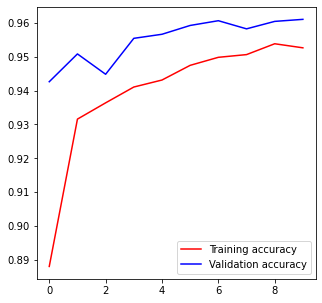

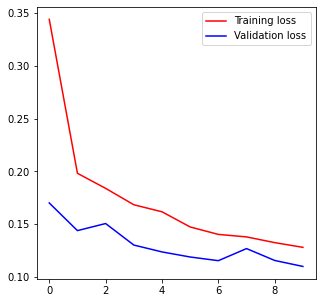

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'],'r',label='Training accuracy')
plt.plot(history.history['val_accuracy'],'b',label='Validation accuracy')
plt.legend()

plt.figure(figsize=(5,5))
plt.plot(history.history['loss'],'r',label='Training loss')
plt.plot(history.history['val_loss'],'b',label='Validation loss')
plt.legend()